In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression

In [3]:
data=pd.read_csv('data.csv')
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


In [4]:
data.isna().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [5]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [6]:
Engine_HP_mean=data['Engine HP'].mean()
data['Engine HP']=data['Engine HP'].fillna(Engine_HP_mean)

In [7]:
data.isna().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP             0
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [8]:
Engine_Fuel_Type_mode=data['Engine Fuel Type'].mode()[0]
data['Engine Fuel Type']=data['Engine Fuel Type'].fillna(Engine_Fuel_Type_mode)
data.isna().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      0
Engine HP             0
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [9]:
Engine_Cylinders_mode=data['Engine Cylinders'].mode()[0]
data['Engine Cylinders']=data['Engine Cylinders'].fillna(Engine_Cylinders_mode)
data.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      6
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [10]:
Number_of_Doors_mode=data['Number of Doors'].mode()[0]
data['Number of Doors']=data['Number of Doors'].fillna(Number_of_Doors_mode)
data.isna().sum()


Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [11]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

## Finding the outliers based on MSRP

In [12]:
q1=np.percentile(data['MSRP'],25)
q2=np.percentile(data['MSRP'],50)
q3=np.percentile(data['MSRP'],75)
IQR=q3-q1
IQR


21231.25

In [13]:
lo_bo = q1 - 1.5 * IQR
up_bo = q3 + 1.5 * IQR

upper_array = np.where(data['MSRP']>=up_bo)[0]
lower_array = np.where(data['MSRP']<=lo_bo)[0]

data.drop(index=upper_array, inplace=True)
data.drop(index=lower_array, inplace=True)


data.shape

(10918, 15)

In [14]:
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

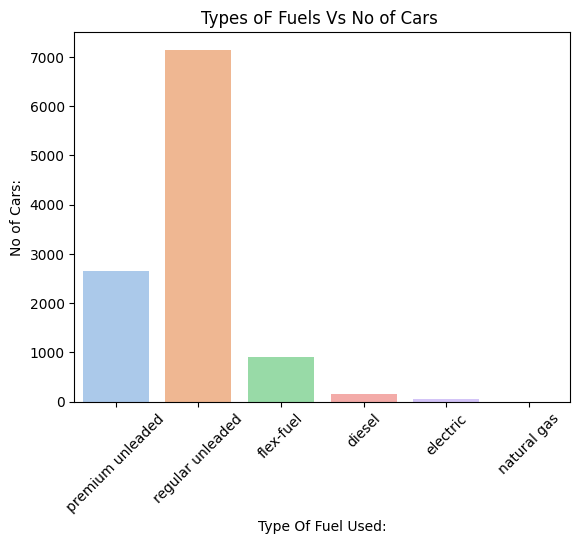

In [15]:
ax=plt.axis()
sns.countplot(x='Engine Fuel Type', data=data, palette='pastel')
plt.xticks(rotation=45)
plt.ylabel("No of Cars:")
plt.xlabel("Type Of Fuel Used:")
plt.title("Types oF Fuels Vs No of Cars ")
plt.show()

Text(0.5, 1.0, 'Transmission Type Vs No of Cars')

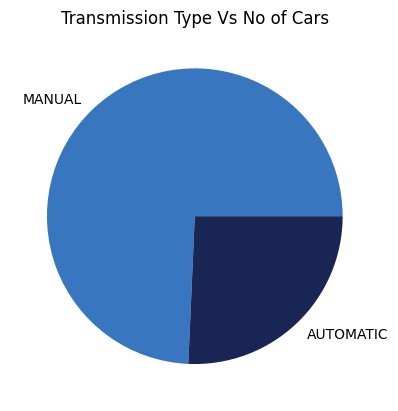

In [16]:
plt.pie(data['Transmission Type'].value_counts(),labels=['MANUAL','AUTOMATIC'],colors=['#3876BF','#192655'])
plt.title('Transmission Type Vs No of Cars')

C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

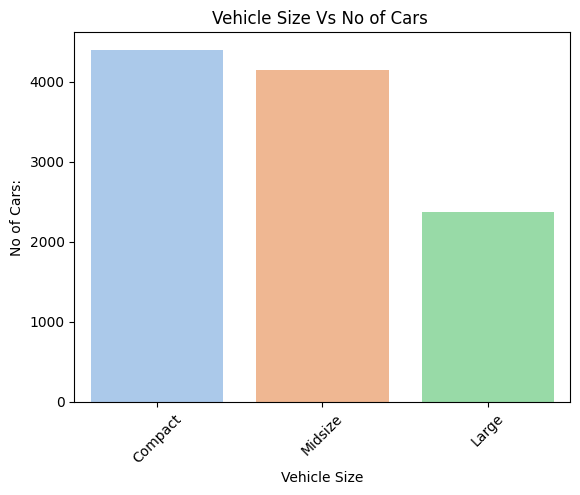

In [17]:
# Vehicle Size
ax=plt.axis()
sns.countplot(x='Vehicle Size', data=data, palette='pastel')
plt.xticks(rotation=45)
plt.ylabel("No of Cars:")
plt.xlabel("Vehicle Size")
plt.title("Vehicle Size Vs No of Cars ")
plt.show()

C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, '1990'),
  Text(1, 0, '1991'),
  Text(2, 0, '1992'),
  Text(3, 0, '1993'),
  Text(4, 0, '1994'),
  Text(5, 0, '1995'),
  Text(6, 0, '1996'),
  Text(7, 0, '1997'),
  Text(8, 0, '1998'),
  Text(9, 0, '1999'),
  Text(10, 0, '2000'),
  Text(11, 0, '2001'),
  Text(12, 0, '2002'),
  Text(13, 0, '2003'),
  Text(14, 0, '2004'),
  Text(15, 0, '2005'),
  Text(16, 0, '2006'),
  Text(17, 0, '2007'),
  Text(18, 0, '2008'),
  Text(19, 0, '2009'),
  Text(20, 0, '2010'),
  Text(21, 0, '2011'),
  Text(22, 0, '2012'),
  Text(23, 0, '2013'),
  Text(24, 0, '2014'),
  Text(25, 0, '2015'),
  Text(26, 0, '2016'),
  Text(27, 0, '2017')])

<Figure size 2500x900 with 0 Axes>

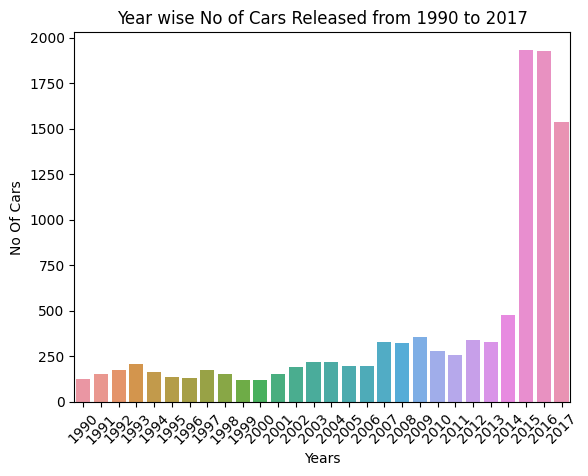

In [18]:
L=data['Year'].unique()
data_year=data.groupby("Year")

year_values=[]
for x in L:
    year_values.append(data_year.get_group(x).shape[0])
plt.figure(figsize=(25,9))
fig, ax = plt.subplots()
ax = sns.barplot(ax = ax, x = L,y =year_values)
ax.set(xlabel='Years',ylabel='No Of Cars', title='Year wise No of Cars Released from 1990 to 2017')
plt.xticks(rotation=45)

C:\Users\umesh\AppData\Local\Temp\ipykernel_27352\2382231606.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Year'])
C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: Futu

<Axes: xlabel='Year', ylabel='Density'>

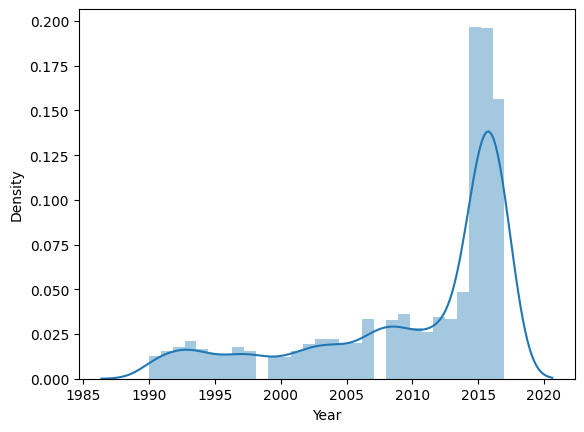

In [19]:
sns.distplot(data['Year'])

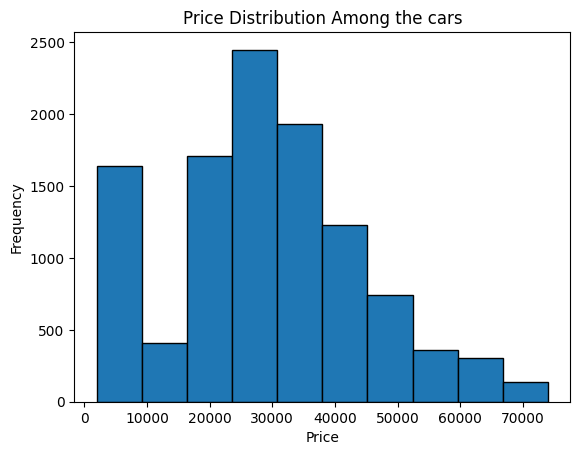

In [20]:
plt.hist(data['MSRP'], bins=10, edgecolor='black')
plt.title('Price Distribution Among the cars')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

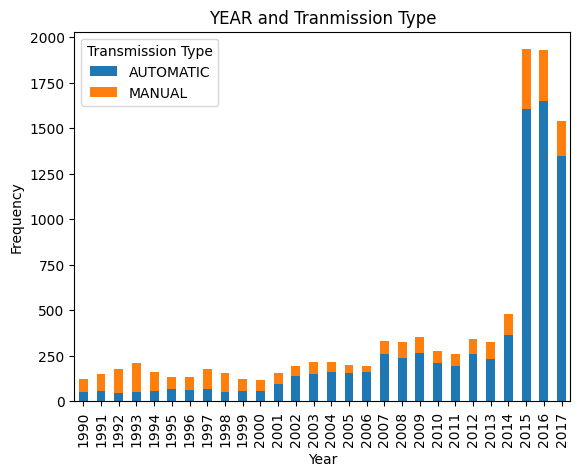

In [21]:
cp_target = data.groupby(['Year', 'Transmission Type']).size().unstack().fillna(0)
cp_target.plot(kind='bar', stacked=True)
plt.title('YEAR and Tranmission Type')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

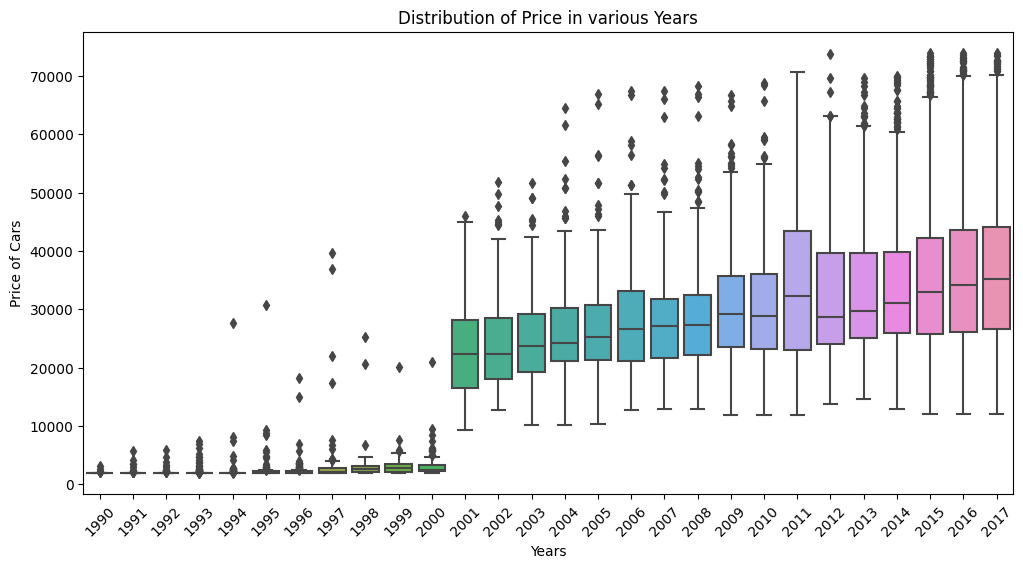

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='MSRP', data=data)
plt.xticks(rotation=45)
plt.xlabel("Years")
plt.ylabel("Price of Cars")
plt.title("Distribution of Price in various Years")
plt.show()

C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

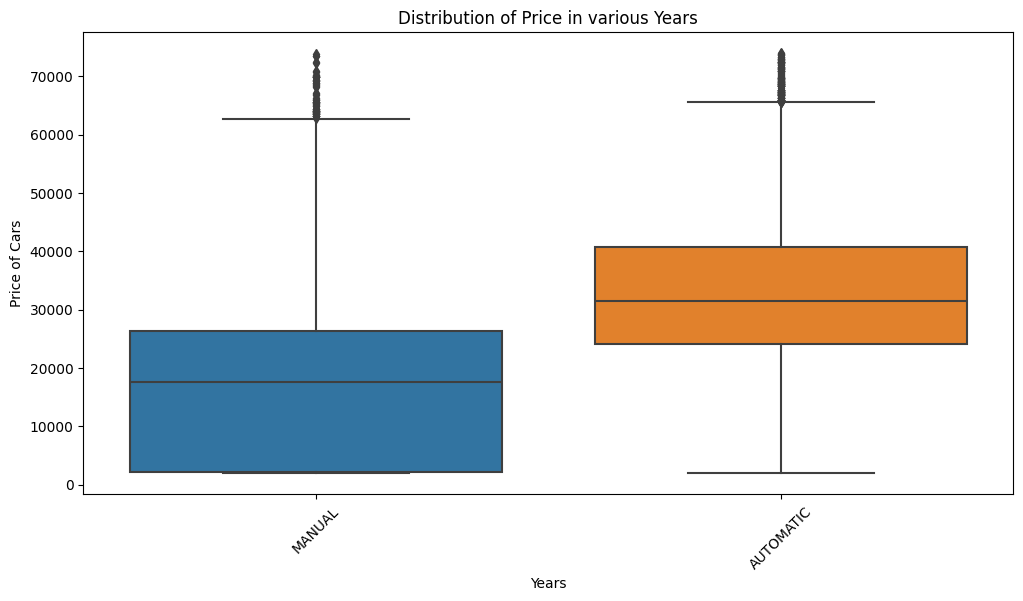

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Transmission Type', y='MSRP', data=data)
plt.xticks(rotation=45)
plt.xlabel("Years")
plt.ylabel("Price of Cars")
plt.title("Distribution of Price in various Years")
plt.show()

## Transforming the Data into Numeric to apply the Machine Learning Algorithm

In [24]:
data['Transmission Type'].unique()

array(['MANUAL', 'AUTOMATIC'], dtype=object)

In [25]:
data['Transmission Type']=data['Transmission Type'].map({'MANUAL': 0,'AUTOMATIC': 1, }).astype(float)
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type    float64
Driven_Wheels         object
Number of Doors      float64
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [26]:
data['Engine Fuel Type'].unique()

array(['premium unleaded', 'regular unleaded', 'flex-fuel', 'diesel',
       'electric', 'natural gas'], dtype=object)

In [27]:
data['Engine Fuel Type']=data['Engine Fuel Type'].map({'premium unleaded':0, 'regular unleaded':1, 'flex-fuel':2, 'diesel':3,
       'electric':4, 'natural gas':5 }).astype(float)

In [28]:
data['Vehicle Size'].unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

In [29]:
data['Vehicle Size']=data['Vehicle Size'].map({'Compact':0, 'Midsize':1, 'Large':2 }).astype(float)

In [30]:
vehi_style_dict = {}
counter = 0
vehi_style_uniq=data['Vehicle Style'].unique()
for value in vehi_style_uniq:
    vehi_style_dict[value] = counter
    counter += 1
data['Vehicle Style']=data['Vehicle Style'].map(vehi_style_dict).astype(float)
data.dtypes


Make                  object
Model                 object
Year                   int64
Engine Fuel Type     float64
Engine HP            float64
Engine Cylinders     float64
Transmission Type    float64
Driven_Wheels         object
Number of Doors      float64
Vehicle Size         float64
Vehicle Style        float64
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [31]:
brand_dict = {}
counter = 0
brand=data['Make'].unique()
for value in brand:
    brand_dict[value] = counter
    counter += 1

data['Make'] = data['Make'].map(brand_dict)

In [32]:
data.dtypes

Make                   int64
Model                 object
Year                   int64
Engine Fuel Type     float64
Engine HP            float64
Engine Cylinders     float64
Transmission Type    float64
Driven_Wheels         object
Number of Doors      float64
Vehicle Size         float64
Vehicle Style        float64
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [33]:
data1=data.drop(['Model','Driven_Wheels'],axis=1)
data1

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,0,2011,0.0,335.0,6.0,0.0,2.0,0.0,0.0,26,19,3916,46135
1,0,2011,0.0,300.0,6.0,0.0,2.0,0.0,1.0,28,19,3916,40650
2,0,2011,0.0,300.0,6.0,0.0,2.0,0.0,0.0,28,20,3916,36350
3,0,2011,0.0,230.0,6.0,0.0,2.0,0.0,0.0,28,18,3916,29450
4,0,2011,0.0,230.0,6.0,0.0,2.0,0.0,1.0,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,29,2012,0.0,300.0,6.0,1.0,4.0,1.0,4.0,23,16,204,46120
11910,29,2012,0.0,300.0,6.0,1.0,4.0,1.0,4.0,23,16,204,56670
11911,29,2012,0.0,300.0,6.0,1.0,4.0,1.0,4.0,23,16,204,50620
11912,29,2013,0.0,300.0,6.0,1.0,4.0,1.0,4.0,23,16,204,50920


In [34]:
# correlation_matrix = data1.corr()
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix ,annot=True,cmap='coolwarm', linewidths=.5)
# plt.show()

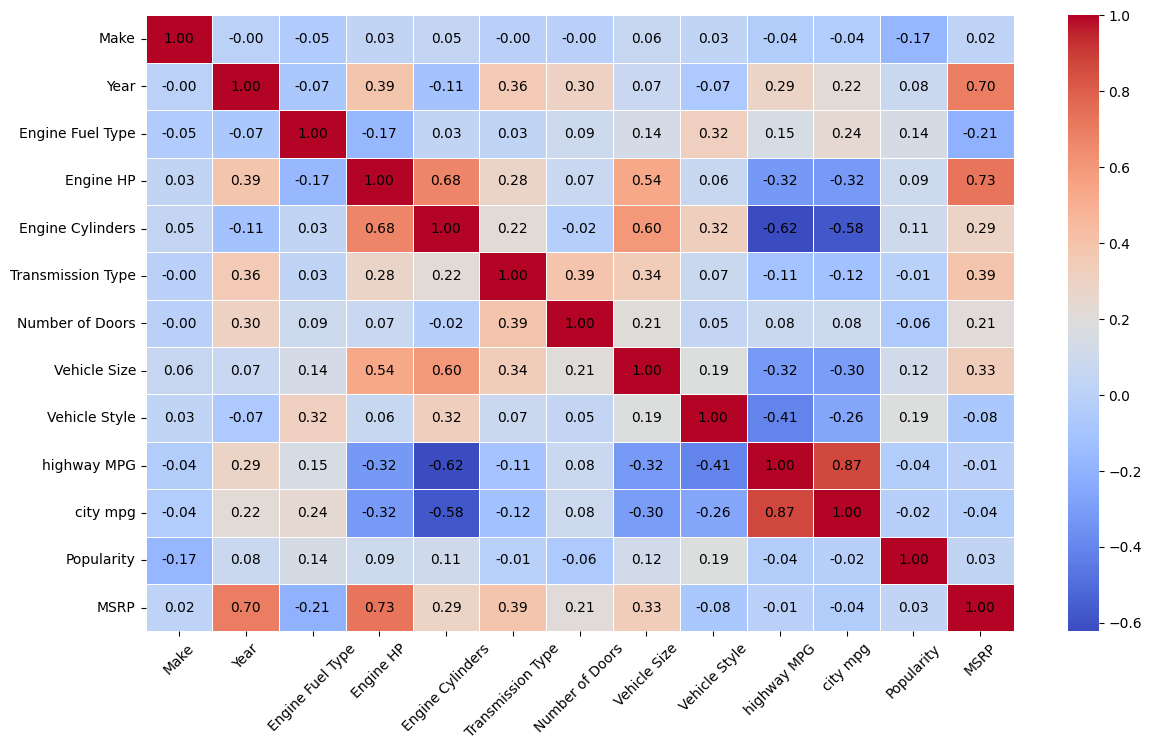

In [35]:
correlation_matrix = data1.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=.5, annot=False)


for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(i + 0.5, j + 0.5, f"{correlation_matrix.iloc[i, j]:.2f}",
                 ha='center', va='center', color='black', fontsize=10)

plt.xticks(rotation=45)
plt.show()

In [36]:
data1

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,0,2011,0.0,335.0,6.0,0.0,2.0,0.0,0.0,26,19,3916,46135
1,0,2011,0.0,300.0,6.0,0.0,2.0,0.0,1.0,28,19,3916,40650
2,0,2011,0.0,300.0,6.0,0.0,2.0,0.0,0.0,28,20,3916,36350
3,0,2011,0.0,230.0,6.0,0.0,2.0,0.0,0.0,28,18,3916,29450
4,0,2011,0.0,230.0,6.0,0.0,2.0,0.0,1.0,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,29,2012,0.0,300.0,6.0,1.0,4.0,1.0,4.0,23,16,204,46120
11910,29,2012,0.0,300.0,6.0,1.0,4.0,1.0,4.0,23,16,204,56670
11911,29,2012,0.0,300.0,6.0,1.0,4.0,1.0,4.0,23,16,204,50620
11912,29,2013,0.0,300.0,6.0,1.0,4.0,1.0,4.0,23,16,204,50920


In [37]:
data1=data1

X = data1.drop(['MSRP'], axis=1)
y = data1['MSRP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the performance of the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse:.2f}")
# print(f"R-squared: {r2:.2f}")

# Define a threshold for accuracy calculation
threshold = 7000 # You can adjust this threshold based on your problem

# Count predictions within the threshold
accurate_predictions = sum(abs(y_pred - y_test) <= threshold)

# Calculate accuracy
accuracy = accurate_predictions / len(y_test) * 100
print(f"Accuracy within: {accuracy:.2f}%")

Accuracy within: 95.47%


In [38]:
# Assuming rf_regressor is your trained RandomForestRegressor model
# Replace rf_regressor with the actual variable name of your model

# Example new data for prediction
new_data = pd.DataFrame({
    'Make': [0.0],
    'Year': [2011],
    'Engine Fuel Type': [0.0],
    'Engine HP': [335.0],
    'Engine Cylinders': [6.0],
    'Transmission Type': [0.0],
    'Number of Doors': [2.0],
    'Vehicle Size': [0.0],
    'Vehicle Style': [0.0],
    'highway MPG': [26],
    'city mpg': [19],
    'Popularity': [3916]
})

# Make predictions on the new data
new_predictions = rf_regressor.predict(new_data)

# Print the predicted MSRP values
print("Predicted MSRP value:")
print(new_predictions[0])


Predicted MSRP value:
50289.0


In [39]:
X = data1.drop([  'MSRP', 'Vehicle Style'], axis=1)

# 'Vehicle Style' is the target variable
y = data1['Vehicle Style']

# Convert 'Vehicle Style' to categorical codes
y = y.astype('category').cat.codes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create a KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68        87
           1       0.59      0.55      0.57        58
           2       0.81      0.88      0.84       268
           3       0.75      0.63      0.69        68
           4       0.84      0.88      0.86        56
           5       0.86      0.78      0.82        55
           6       0.91      0.89      0.90       241
           7       0.86      0.86      0.86        44
           8       0.67      0.80      0.73         5
           9       0.61      0.74      0.67        69
          10       0.76      0.82      0.78        38
          11       0.57      0.44      0.50        68
          12       0.78      0.78      0.78        18
          13       0.80      1.00      0.89         8
          14       1.00      1.00      1.00         2
          15       0.83      0.71      0.77         7

    accuracy                           0.7

In [40]:
new_data_knn = pd.DataFrame({
    'Make': [0.0],
    'Year': [2011],
    'Engine Fuel Type': [0.0],
    'Engine HP': [335.0],
    'Engine Cylinders': [6.0],
    'Transmission Type': [0.0],
    'Number of Doors': [2.0],
    'Vehicle Size': [0.0],
    'highway MPG': [26],
    'city mpg': [19],
    'Popularity': [3916],
})

new_predictions_knn = knn_classifier.predict(new_data_knn)
print("Predicted Vehicle Style:")
print(new_predictions_knn[0]," ",vehi_style_uniq[new_predictions_knn[0]])



Predicted Vehicle Style:
1   Convertible


In [41]:
X = data1.drop(['Make','MSRP'], axis=1)
y = data1['Make']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regression.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")

# Display additional metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 91.16
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        56
           2       1.00      0.07      0.12        15
           3       0.78      0.79      0.78        48
           4       1.00      1.00      1.00        28
           5       1.00      0.88      0.93       112
           6       0.61      0.51      0.56        53
           7       0.97      0.95      0.96        97
           8       0.73      0.93      0.82        43
           9       0.00      0.00      0.00         2
          10       0.92      1.00      0.96       156
          11       0.70      0.71      0.70        45
          12       0.00      0.00      0.00         7
          13       1.00      0.87      0.93        31
          14       0.91      0.99      0.95        99
          15       1.00      1.00      1.00        57
          16       0.86      0.60      0.7

C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

In [42]:
new_data_logistic = pd.DataFrame({
    'Year': [2012],
    'Engine Fuel Type': [0.0],
    'Engine HP': [300.0],
    'Engine Cylinders': [6.0],
    'Transmission Type': [1.0],
    'Number of Doors': [4.0],
    'Vehicle Size': [1.0],
    'Vehicle Style': [4.0],
    'highway MPG': [23],
    'city mpg': [16],
    'Popularity': [3916],
})

new_predictions_logistic = logistic_regression.predict(new_data_logistic)
print("Predicted Brand:")
print(new_predictions_logistic[0]," ",brand[new_predictions_logistic[0]])



Predicted Brand:
0   BMW


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression

In [44]:
data=pd.read_csv('data.csv')
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


In [45]:
data.isna().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [46]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [47]:
Engine_HP_mean=data['Engine HP'].mean()
data['Engine HP']=data['Engine HP'].fillna(Engine_HP_mean)

In [48]:
data.isna().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP             0
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [49]:
Engine_Fuel_Type_mode=data['Engine Fuel Type'].mode()[0]
data['Engine Fuel Type']=data['Engine Fuel Type'].fillna(Engine_Fuel_Type_mode)
data.isna().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      0
Engine HP             0
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [50]:
Engine_Cylinders_mode=data['Engine Cylinders'].mode()[0]
data['Engine Cylinders']=data['Engine Cylinders'].fillna(Engine_Cylinders_mode)
data.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      6
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [51]:
Number_of_Doors_mode=data['Number of Doors'].mode()[0]
data['Number of Doors']=data['Number of Doors'].fillna(Number_of_Doors_mode)
data.isna().sum()


Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [52]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

## Finding the outliers based on MSRP

In [53]:
q1=np.percentile(data['MSRP'],25)
q2=np.percentile(data['MSRP'],50)
q3=np.percentile(data['MSRP'],75)
IQR=q3-q1
IQR


21231.25

In [54]:
lo_bo = q1 - 1.5 * IQR
up_bo = q3 + 1.5 * IQR

upper_array = np.where(data['MSRP']>=up_bo)[0]
lower_array = np.where(data['MSRP']<=lo_bo)[0]

data.drop(index=upper_array, inplace=True)
data.drop(index=lower_array, inplace=True)


data.shape

(10918, 15)

In [55]:
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

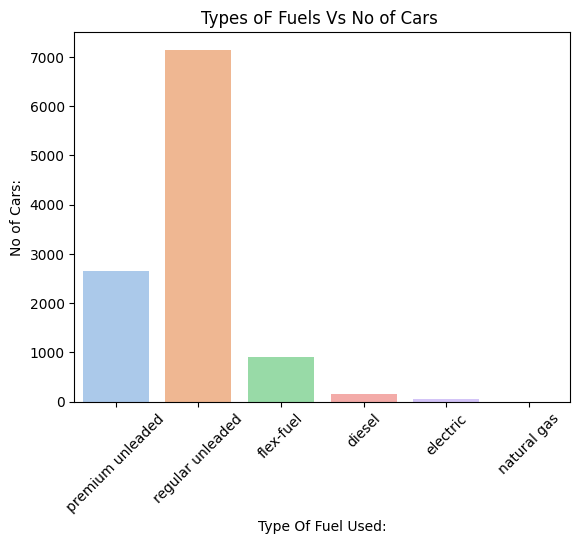

In [56]:
ax=plt.axis()
sns.countplot(x='Engine Fuel Type', data=data, palette='pastel')
plt.xticks(rotation=45)
plt.ylabel("No of Cars:")
plt.xlabel("Type Of Fuel Used:")
plt.title("Types oF Fuels Vs No of Cars ")
plt.show()

Text(0.5, 1.0, 'Transmission Type Vs No of Cars')

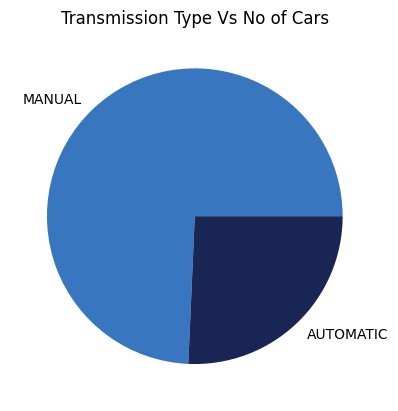

In [57]:
plt.pie(data['Transmission Type'].value_counts(),labels=['MANUAL','AUTOMATIC'],colors=['#3876BF','#192655'])
plt.title('Transmission Type Vs No of Cars')

C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

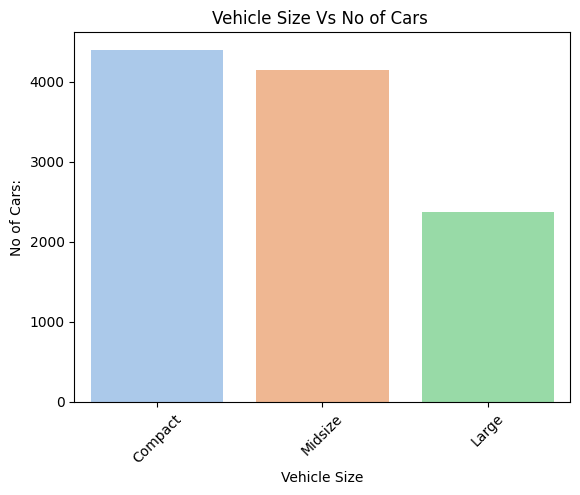

In [58]:
# Vehicle Size
ax=plt.axis()
sns.countplot(x='Vehicle Size', data=data, palette='pastel')
plt.xticks(rotation=45)
plt.ylabel("No of Cars:")
plt.xlabel("Vehicle Size")
plt.title("Vehicle Size Vs No of Cars ")
plt.show()

C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, '1990'),
  Text(1, 0, '1991'),
  Text(2, 0, '1992'),
  Text(3, 0, '1993'),
  Text(4, 0, '1994'),
  Text(5, 0, '1995'),
  Text(6, 0, '1996'),
  Text(7, 0, '1997'),
  Text(8, 0, '1998'),
  Text(9, 0, '1999'),
  Text(10, 0, '2000'),
  Text(11, 0, '2001'),
  Text(12, 0, '2002'),
  Text(13, 0, '2003'),
  Text(14, 0, '2004'),
  Text(15, 0, '2005'),
  Text(16, 0, '2006'),
  Text(17, 0, '2007'),
  Text(18, 0, '2008'),
  Text(19, 0, '2009'),
  Text(20, 0, '2010'),
  Text(21, 0, '2011'),
  Text(22, 0, '2012'),
  Text(23, 0, '2013'),
  Text(24, 0, '2014'),
  Text(25, 0, '2015'),
  Text(26, 0, '2016'),
  Text(27, 0, '2017')])

<Figure size 2500x900 with 0 Axes>

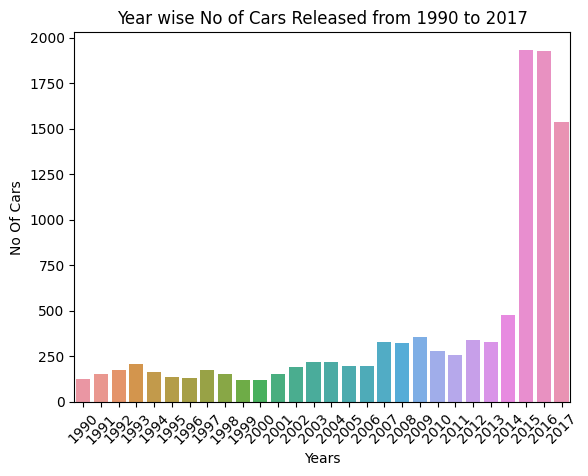

In [59]:
L=data['Year'].unique()
data_year=data.groupby("Year")

year_values=[]
for x in L:
    year_values.append(data_year.get_group(x).shape[0])
plt.figure(figsize=(25,9))
fig, ax = plt.subplots()
ax = sns.barplot(ax = ax, x = L,y =year_values)
ax.set(xlabel='Years',ylabel='No Of Cars', title='Year wise No of Cars Released from 1990 to 2017')
plt.xticks(rotation=45)

C:\Users\umesh\AppData\Local\Temp\ipykernel_27352\2382231606.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Year'])
C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: Futu

<Axes: xlabel='Year', ylabel='Density'>

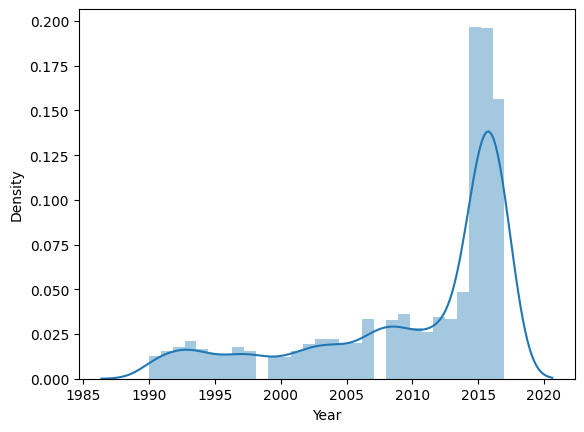

In [60]:
sns.distplot(data['Year'])

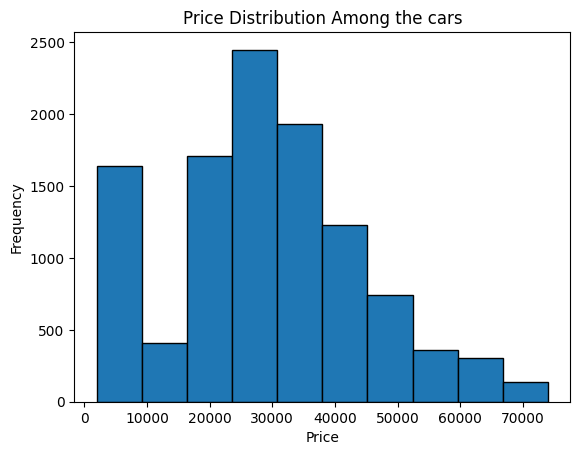

In [61]:
plt.hist(data['MSRP'], bins=10, edgecolor='black')
plt.title('Price Distribution Among the cars')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

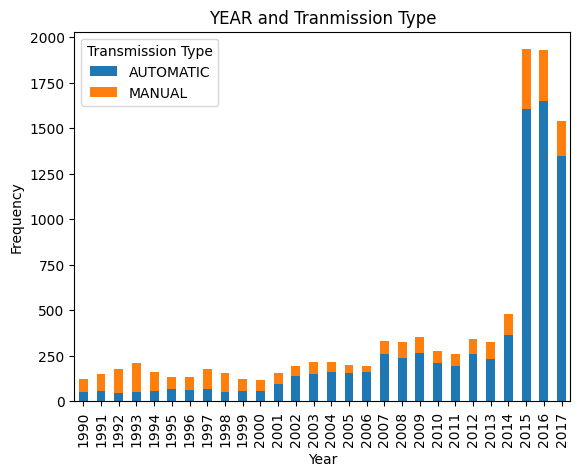

In [62]:
cp_target = data.groupby(['Year', 'Transmission Type']).size().unstack().fillna(0)
cp_target.plot(kind='bar', stacked=True)
plt.title('YEAR and Tranmission Type')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

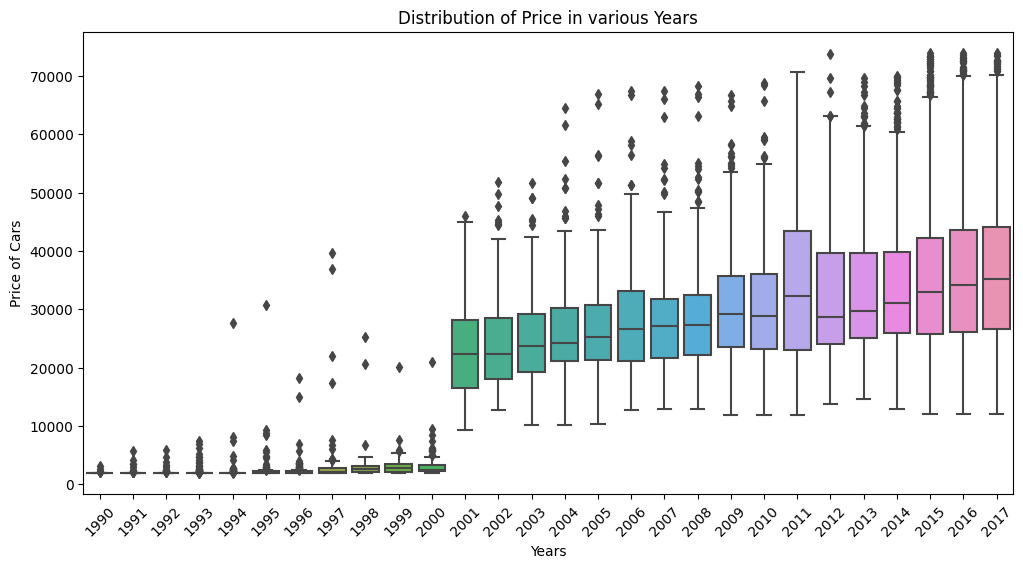

In [63]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='MSRP', data=data)
plt.xticks(rotation=45)
plt.xlabel("Years")
plt.ylabel("Price of Cars")
plt.title("Distribution of Price in various Years")
plt.show()

C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

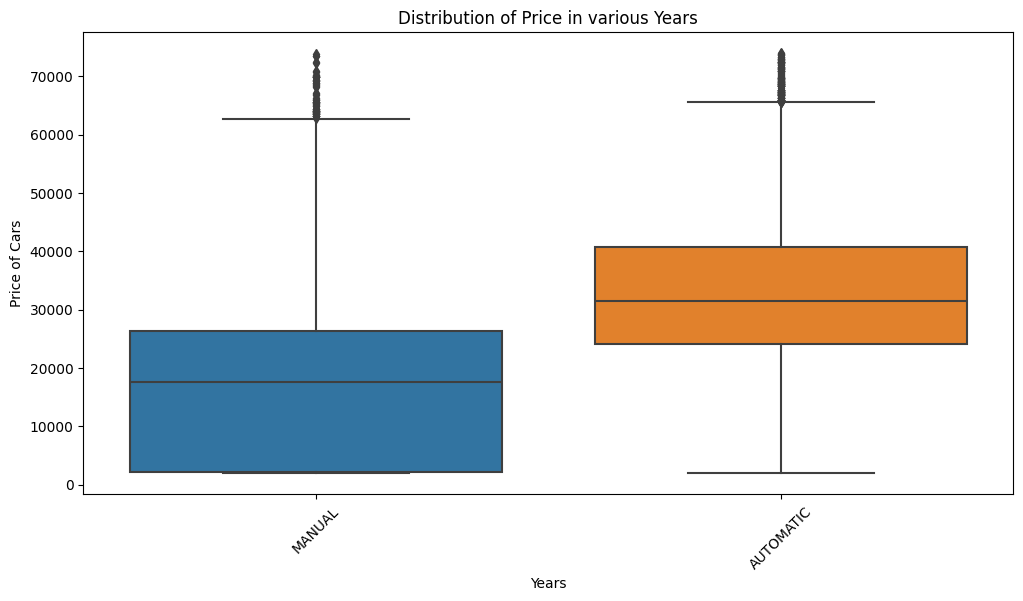

In [64]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Transmission Type', y='MSRP', data=data)
plt.xticks(rotation=45)
plt.xlabel("Years")
plt.ylabel("Price of Cars")
plt.title("Distribution of Price in various Years")
plt.show()

## Transforming the Data into Numeric to apply the Machine Learning Algorithm

In [65]:
data['Transmission Type'].unique()

array(['MANUAL', 'AUTOMATIC'], dtype=object)

In [66]:
data['Transmission Type']=data['Transmission Type'].map({'MANUAL': 0,'AUTOMATIC': 1, }).astype(float)
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type    float64
Driven_Wheels         object
Number of Doors      float64
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [67]:
data['Engine Fuel Type'].unique()

array(['premium unleaded', 'regular unleaded', 'flex-fuel', 'diesel',
       'electric', 'natural gas'], dtype=object)

In [68]:
data['Engine Fuel Type']=data['Engine Fuel Type'].map({'premium unleaded':0, 'regular unleaded':1, 'flex-fuel':2, 'diesel':3,
       'electric':4, 'natural gas':5 }).astype(float)

In [69]:
data['Vehicle Size'].unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

In [70]:
data['Vehicle Size']=data['Vehicle Size'].map({'Compact':0, 'Midsize':1, 'Large':2 }).astype(float)

In [71]:
vehi_style_dict = {}
counter = 0
vehi_style_uniq=data['Vehicle Style'].unique()
for value in vehi_style_uniq:
    vehi_style_dict[value] = counter
    counter += 1
data['Vehicle Style']=data['Vehicle Style'].map(vehi_style_dict).astype(float)
data.dtypes


Make                  object
Model                 object
Year                   int64
Engine Fuel Type     float64
Engine HP            float64
Engine Cylinders     float64
Transmission Type    float64
Driven_Wheels         object
Number of Doors      float64
Vehicle Size         float64
Vehicle Style        float64
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [72]:
brand_dict = {}
counter = 0
brand=data['Make'].unique()
for value in brand:
    brand_dict[value] = counter
    counter += 1

data['Make'] = data['Make'].map(brand_dict)

In [73]:
data.dtypes

Make                   int64
Model                 object
Year                   int64
Engine Fuel Type     float64
Engine HP            float64
Engine Cylinders     float64
Transmission Type    float64
Driven_Wheels         object
Number of Doors      float64
Vehicle Size         float64
Vehicle Style        float64
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [74]:
data1=data.drop(['Model','Driven_Wheels'],axis=1)
data1

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,0,2011,0.0,335.0,6.0,0.0,2.0,0.0,0.0,26,19,3916,46135
1,0,2011,0.0,300.0,6.0,0.0,2.0,0.0,1.0,28,19,3916,40650
2,0,2011,0.0,300.0,6.0,0.0,2.0,0.0,0.0,28,20,3916,36350
3,0,2011,0.0,230.0,6.0,0.0,2.0,0.0,0.0,28,18,3916,29450
4,0,2011,0.0,230.0,6.0,0.0,2.0,0.0,1.0,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,29,2012,0.0,300.0,6.0,1.0,4.0,1.0,4.0,23,16,204,46120
11910,29,2012,0.0,300.0,6.0,1.0,4.0,1.0,4.0,23,16,204,56670
11911,29,2012,0.0,300.0,6.0,1.0,4.0,1.0,4.0,23,16,204,50620
11912,29,2013,0.0,300.0,6.0,1.0,4.0,1.0,4.0,23,16,204,50920


In [75]:
# correlation_matrix = data1.corr()
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix ,annot=True,cmap='coolwarm', linewidths=.5)
# plt.show()

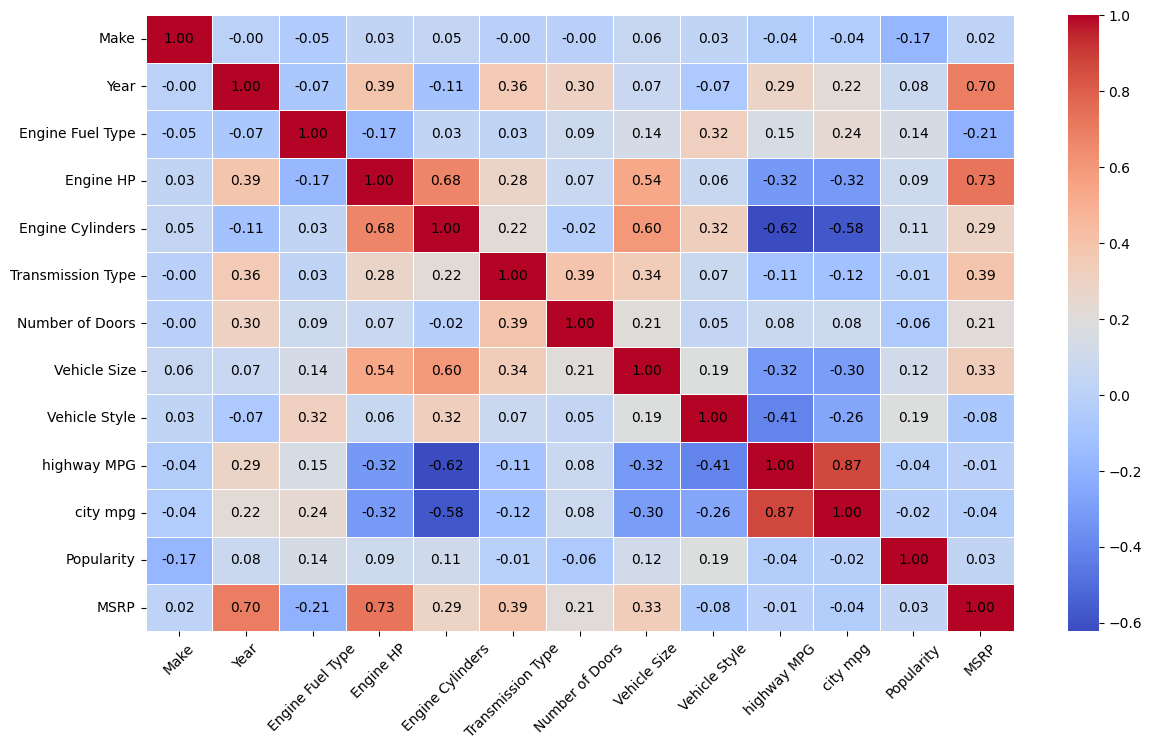

In [76]:
correlation_matrix = data1.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=.5, annot=False)


for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(i + 0.5, j + 0.5, f"{correlation_matrix.iloc[i, j]:.2f}",
                 ha='center', va='center', color='black', fontsize=10)

plt.xticks(rotation=45)
plt.show()

In [77]:
data1

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,0,2011,0.0,335.0,6.0,0.0,2.0,0.0,0.0,26,19,3916,46135
1,0,2011,0.0,300.0,6.0,0.0,2.0,0.0,1.0,28,19,3916,40650
2,0,2011,0.0,300.0,6.0,0.0,2.0,0.0,0.0,28,20,3916,36350
3,0,2011,0.0,230.0,6.0,0.0,2.0,0.0,0.0,28,18,3916,29450
4,0,2011,0.0,230.0,6.0,0.0,2.0,0.0,1.0,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,29,2012,0.0,300.0,6.0,1.0,4.0,1.0,4.0,23,16,204,46120
11910,29,2012,0.0,300.0,6.0,1.0,4.0,1.0,4.0,23,16,204,56670
11911,29,2012,0.0,300.0,6.0,1.0,4.0,1.0,4.0,23,16,204,50620
11912,29,2013,0.0,300.0,6.0,1.0,4.0,1.0,4.0,23,16,204,50920


In [78]:
data1=data1

X = data1.drop(['MSRP'], axis=1)
y = data1['MSRP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the performance of the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse:.2f}")
# print(f"R-squared: {r2:.2f}")

# Define a threshold for accuracy calculation
threshold = 7000 # You can adjust this threshold based on your problem

# Count predictions within the threshold
accurate_predictions = sum(abs(y_pred - y_test) <= threshold)

# Calculate accuracy
accuracy = accurate_predictions / len(y_test) * 100
print(f"Accuracy within: {accuracy:.2f}%")

Accuracy within: 95.47%


In [79]:
# Assuming rf_regressor is your trained RandomForestRegressor model
# Replace rf_regressor with the actual variable name of your model

# Example new data for prediction
new_data = pd.DataFrame({
    'Make': [0.0],
    'Year': [2011],
    'Engine Fuel Type': [0.0],
    'Engine HP': [335.0],
    'Engine Cylinders': [6.0],
    'Transmission Type': [0.0],
    'Number of Doors': [2.0],
    'Vehicle Size': [0.0],
    'Vehicle Style': [0.0],
    'highway MPG': [26],
    'city mpg': [19],
    'Popularity': [3916]
})

# Make predictions on the new data
new_predictions = rf_regressor.predict(new_data)

# Print the predicted MSRP values
print("Predicted MSRP value:")
print(new_predictions[0])


Predicted MSRP value:
50289.0


In [80]:
X = data1.drop([  'MSRP', 'Vehicle Style'], axis=1)

# 'Vehicle Style' is the target variable
y = data1['Vehicle Style']

# Convert 'Vehicle Style' to categorical codes
y = y.astype('category').cat.codes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create a KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68        87
           1       0.59      0.55      0.57        58
           2       0.81      0.88      0.84       268
           3       0.75      0.63      0.69        68
           4       0.84      0.88      0.86        56
           5       0.86      0.78      0.82        55
           6       0.91      0.89      0.90       241
           7       0.86      0.86      0.86        44
           8       0.67      0.80      0.73         5
           9       0.61      0.74      0.67        69
          10       0.76      0.82      0.78        38
          11       0.57      0.44      0.50        68
          12       0.78      0.78      0.78        18
          13       0.80      1.00      0.89         8
          14       1.00      1.00      1.00         2
          15       0.83      0.71      0.77         7

    accuracy                           0.7

In [81]:
new_data_knn = pd.DataFrame({
    'Make': [0.0],
    'Year': [2011],
    'Engine Fuel Type': [0.0],
    'Engine HP': [335.0],
    'Engine Cylinders': [6.0],
    'Transmission Type': [0.0],
    'Number of Doors': [2.0],
    'Vehicle Size': [0.0],
    'highway MPG': [26],
    'city mpg': [19],
    'Popularity': [3916],
})

new_predictions_knn = knn_classifier.predict(new_data_knn)
print("Predicted Vehicle Style:")
print(new_predictions_knn[0]," ",vehi_style_uniq[new_predictions_knn[0]])



Predicted Vehicle Style:
1   Convertible


In [82]:
X = data1.drop(['Make','MSRP'], axis=1)
y = data1['Make']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regression.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")

# Display additional metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 91.16
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        56
           2       1.00      0.07      0.12        15
           3       0.78      0.79      0.78        48
           4       1.00      1.00      1.00        28
           5       1.00      0.88      0.93       112
           6       0.61      0.51      0.56        53
           7       0.97      0.95      0.96        97
           8       0.73      0.93      0.82        43
           9       0.00      0.00      0.00         2
          10       0.92      1.00      0.96       156
          11       0.70      0.71      0.70        45
          12       0.00      0.00      0.00         7
          13       1.00      0.87      0.93        31
          14       0.91      0.99      0.95        99
          15       1.00      1.00      1.00        57
          16       0.86      0.60      0.7

C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

In [83]:
new_data_logistic = pd.DataFrame({
    'Year': [2012],
    'Engine Fuel Type': [0.0],
    'Engine HP': [300.0],
    'Engine Cylinders': [6.0],
    'Transmission Type': [1.0],
    'Number of Doors': [4.0],
    'Vehicle Size': [1.0],
    'Vehicle Style': [4.0],
    'highway MPG': [23],
    'city mpg': [16],
    'Popularity': [3916],
})

new_predictions_logistic = logistic_regression.predict(new_data_logistic)
print("Predicted Brand:")
print(new_predictions_logistic[0]," ",brand[new_predictions_logistic[0]])



Predicted Brand:
0   BMW


: 